In [1]:
!pip install -q statsbombpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsbombpy import sb

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

In [2]:
comps = sb.competitions()
comps_cols = ["competition_id", "season_id", "country_name",
              "competition_name", "season_name"]
display(comps[comps_cols].head(20))
print("Total competitions:", len(comps))

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,season_name
0,9,281,Germany,1. Bundesliga,2023/2024
1,9,27,Germany,1. Bundesliga,2015/2016
2,1267,107,Africa,African Cup of Nations,2023
3,16,4,Europe,Champions League,2018/2019
4,16,1,Europe,Champions League,2017/2018
5,16,2,Europe,Champions League,2016/2017
6,16,27,Europe,Champions League,2015/2016
7,16,26,Europe,Champions League,2014/2015
8,16,25,Europe,Champions League,2013/2014
9,16,24,Europe,Champions League,2012/2013


Total competitions: 75


In [3]:
wc = comps[(comps["competition_name"] == "FIFA World Cup") &
           (comps["season_name"].str.contains("2022"))]

wc

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-12-16T10:15:11.055845,2024-12-16T10:21:13.710934,2024-12-16T10:21:13.710934,2024-12-16T10:15:11.055845


In [4]:
comp_id  = int(wc["competition_id"].iloc[0])
season_id = int(wc["season_id"].iloc[0])

comp_id, season_id

(43, 106)

In [5]:
matches = sb.matches(competition_id=comp_id, season_id=season_id)
print("Matches shape:", matches.shape)
display(matches.head())

# pick one match for EDA
match_id = int(matches["match_id"].iloc[0])
match_id

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Matches shape: (64, 22)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,available,2023-02-17T23:45:15.306706,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,available,2023-07-30T07:46:05.382784,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,available,2023-04-28T17:13:10.958725,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,available,2023-06-24T17:17:27.911026,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,available,2023-02-28T21:25:20.888552,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


3857256

In [6]:
events_raw = sb.events(match_id=match_id)
print("Raw events shape:", events_raw.shape)
display(events_raw.head())

/usr/local/lib/python3.12/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Raw events shape: (3211, 91)


,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_miscommunication,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,093f898d-33b1-4425-b591-37dd9c9bf70b,1,NaN,NaN,NaN,3857256,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Serbia,786,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",Serbia,786,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79a9efbb-b5e5-45b0-983d-8729bcc4a0e1,2,NaN,NaN,NaN,3857256,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Serbia,786,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Switzerland,773,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4cdfc71-b9f4-4751-a714-e816c1419457,3,NaN,NaN,NaN,3857256,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Serbia,786,[51f295b8-da96-428e-ab47-90f380f8cf53],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51f295b8-da96-428e-ab47-90f380f8cf53,4,NaN,NaN,NaN,3857256,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Serbia,786,[c4cdfc71-b9f4-4751-a714-e816c1419457],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serbia,786,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749a27ed-92e8-4723-9ac5-dcd074535537,1516,NaN,NaN,NaN,3857256,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,107,Switzerland,773,[f6a97503-ed87-4a13-89ba-8c4bbccc6686],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serbia,786,00:00:00.000,Half Start,NaN


In [7]:
events = events_raw.copy()

for col in ["type", "team", "player", "position", "play_pattern"]:
    if col in events.columns:
        events[col] = events[col].apply(
            lambda v: v.get("name") if isinstance(v, dict) else v
        )

if "location" in events.columns:
    loc = events["location"].apply(
        lambda v: v if isinstance(v, (list, tuple)) and len(v) == 2 else [np.nan, np.nan]
    )
    loc_df = pd.DataFrame(loc.tolist(), columns=["x", "y"], index=events.index)
    events[["x", "y"]] = loc_df

print("Cleaned events shape:", events.shape)
display(events[["type", "team", "player", "minute", "x", "y"]].head(12))

Cleaned events shape: (3211, 93)


,type,team,player,minute,x,y
0,Starting XI,Serbia,NaN,0,NaN,NaN
1,Starting XI,Switzerland,NaN,0,NaN,NaN
2,Half Start,Switzerland,NaN,0,NaN,NaN
3,Half Start,Serbia,NaN,0,NaN,NaN
4,Half Start,Serbia,NaN,45,NaN,NaN
5,Half Start,Switzerland,NaN,45,NaN,NaN
6,Pass,Switzerland,Breel-Donald Embolo,0,61.0,40.1
7,Pass,Switzerland,Remo Freuler,0,39.7,45.5
8,Pass,Switzerland,Silvan Widmer,0,42.3,72.2
9,Pass,Switzerland,Fabian Lukas Schär,0,23.1,62.4


In [8]:
events["type"].value_counts().head(20)

,count
type,
Pass,966
Ball Receipt*,907
Carry,667
Pressure,177
Ball Recovery,92
Duel,68
Block,40
Clearance,36
Foul Committed,35


In [9]:
actions = events[events["type"].isin(["Pass", "Carry", "Shot", "Duel"])]
actions.head()

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_miscommunication,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4acb4fd2-f46a-4d73-993c-e06597873924,5,NaN,NaN,"[61.0, 40.1]",3857256,0,NaN,NaN,NaN,2.943123,NaN,Right Foot,NaN,NaN,NaN,"[43.1, 43.7]",NaN,Ground Pass,18.258423,NaN,NaN,NaN,Remo Freuler,6983.0,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Breel-Donald Embolo,5545.0,Center Forward,2,Switzerland,773,[b0d0583a-d544-4ab1-9043-6b42a57c27a8],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:00.521,Pass,NaN,61.0,40.1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.752177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f21fda3d-cb2c-4608-af2d-201d1ad8101c,8,NaN,NaN,"[39.7, 45.5]",3857256,0,NaN,NaN,NaN,1.473724,NaN,Right Foot,NaN,NaN,NaN,"[42.3, 72.2]",NaN,Ground Pass,26.826294,NaN,NaN,NaN,Silvan Widmer,7796.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Remo Freuler,6983.0,Right Defensive Midfield,2,Switzerland,773,[c2ce6157-3b39-4a0e-b63f-3178874e1cf4],3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:03.385,Pass,NaN,39.7,45.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.787088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57654ce3-e311-49c4-9ba7-4fab2ec66f71,11,NaN,NaN,"[42.3, 72.2]",3857256,0,NaN,NaN,NaN,-2.669646,NaN,Right Foot,NaN,NaN,NaN,"[23.1, 62.4]",NaN,Ground Pass,21.556438,NaN,NaN,NaN,Fabian Lukas Schär,5537.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Silvan Widmer,7796.0,Right Back,2,Switzerland,773,[e12a759e-24cc-49f4-baec-7435b52965fe],6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:06.697,Pass,NaN,42.3,72.2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.037477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4fc9de7-9029-4f18-bd6c-3d2a3c5e276a,13,NaN,NaN,"[23.1, 62.4]",3857256,0,NaN,NaN,NaN,0.203045,NaN,Right Foot,NaN,NaN,NaN,"[91.1, 76.4]",NaN,High Pass,69.426216,NaN,NaN,NaN,Djibril Sow,16026.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Fabian Lukas Schär,5537.0,Right Center Back,2,Switzerland,773,[59c636fa-6894-4673-993d-262f379dacac],8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:08.484,Pass,NaN,23.1,62.4
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.823520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d89e79ae-d538-44c2-9a5f-f979984ef67a,16,NaN,NaN,"[105.6, 74.4]",3857256,0,NaN,NaN,NaN,-1.476588,NaN,Right Foot,True,NaN,NaN,"[108.0, 49.0]",NaN,Ground Pass,25.513134,NaN,Incomplete,NaN,Ruben 

In [10]:
events["x"] = events["location"].apply(lambda L: L[0] if isinstance(L, list) else None)
events["y"] = events["location"].apply(lambda L: L[1] if isinstance(L, list) else None)

In [11]:
if "pass_type" in events.columns:
    events["pass_type"] = events["pass_type"].apply(
        lambda v: v.get("name") if isinstance(v, dict) else v
    )

In [12]:
[c for c in events.columns if c.startswith("pass")]

['pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_length',
 'pass_miscommunication',
 'pass_outcome',
 'pass_outswinging',
 'pass_recipient',
 'pass_recipient_id',
 'pass_shot_assist',
 'pass_switch',
 'pass_technique',
 'pass_through_ball',
 'pass_type']

In [13]:
shots = events[events["type"]=="Shot"]
shots["x"] = shots["location"].apply(lambda L: L[0] if isinstance(L, list) else None)
shots["y"] = shots["location"].apply(lambda L: L[1] if isinstance(L, list) else None)

shots[["minute","player","team","shot_outcome","shot_statsbomb_xg","x","y"]].head()

/tmp/ipython-input-286745336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["x"] = shots["location"].apply(lambda L: L[0] if isinstance(L, list) else None)
/tmp/ipython-input-286745336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["y"] = shots["location"].apply(lambda L: L[1] if isinstance(L, list) else None)


,minute,player,team,shot_outcome,shot_statsbomb_xg,x,y
2674,0,Granit Xhaka,Switzerland,Blocked,0.036566,96.0,38.8
2675,0,Breel-Donald Embolo,Switzerland,Saved,0.353289,113.1,40.7
2676,0,Granit Xhaka,Switzerland,Saved,0.069527,103.8,41.9
2677,4,Nikola Milenković,Serbia,Off T,0.081609,112.2,36.8
2678,10,Andrija Živković,Serbia,Post,0.030002,97.8,51.5


In [14]:
missing = (
    events.isna()
    .mean()
    .sort_values(ascending=False)
)

print("Top 20 columns by missingness:")
print(missing.head(20))

Top 20 columns by missingness:
block_offensive             0.999689
block_deflection            0.999689
foul_committed_type         0.999689
shot_open_goal              0.999689
pass_deflected              0.999689
shot_deflected              0.999689
injury_stoppage_in_chain    0.999377
shot_aerial_won             0.999377
pass_outswinging            0.999377
dribble_nutmeg              0.999377
pass_miscommunication       0.999377
foul_won_advantage          0.999066
foul_committed_advantage    0.999066
shot_one_on_one             0.999066
bad_behaviour_card          0.998754
pass_goal_assist            0.998754
pass_cut_back               0.998754
tactics                     0.998754
clearance_left_foot         0.998443
clearance_aerial_won        0.998443
dtype: float64


In [15]:
important_cols = [
    "shot_statsbomb_xg",
    "shot_outcome",
    "shot_body_part",
    "shot_technique",
    "shot_type",
    "location",
    "player",
    "team",
    "minute"
]

print(shots[important_cols].isna().mean())

shot_statsbomb_xg    0.0
shot_outcome         0.0
shot_body_part       0.0
shot_technique       0.0
shot_type            0.0
location             0.0
player               0.0
team                 0.0
minute               0.0
dtype: float64


In [16]:
# Drop columns that are more than 99% missing
cols_to_drop = missing[missing > 0.99].index
events_reduced = events.drop(columns=cols_to_drop)
print("Original columns:", events.shape[1])
print("Reduced columns:", events_reduced.shape[1])

Original columns: 93
Reduced columns: 39


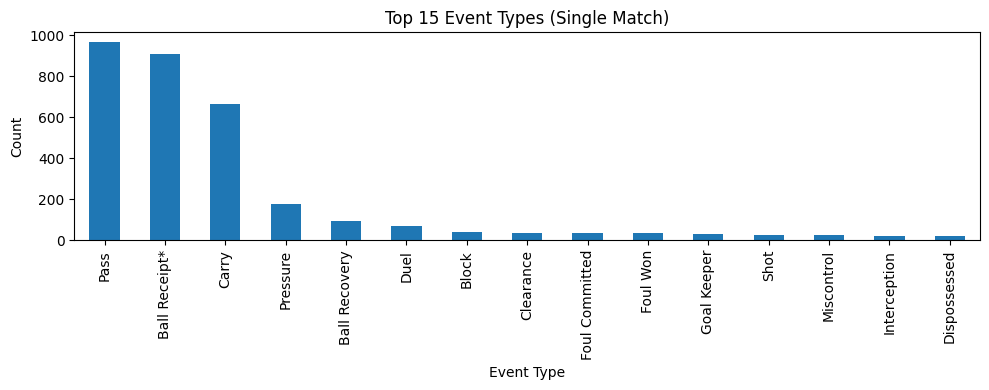

In [17]:
if "type" in events.columns:
    event_counts = events["type"].value_counts()

    plt.figure(figsize=(10, 4))
    event_counts.head(15).plot(kind="bar")
    plt.xlabel("Event Type")
    plt.ylabel("Count")
    plt.title("Top 15 Event Types (Single Match)")
    plt.tight_layout()
    plt.show()
else:
    print("No 'type' column found.")

Shots total: 26
Teams in shots: ['Switzerland', 'Serbia']
Switzerland shots: 14, goals: 3
Serbia shots: 12, goals: 2


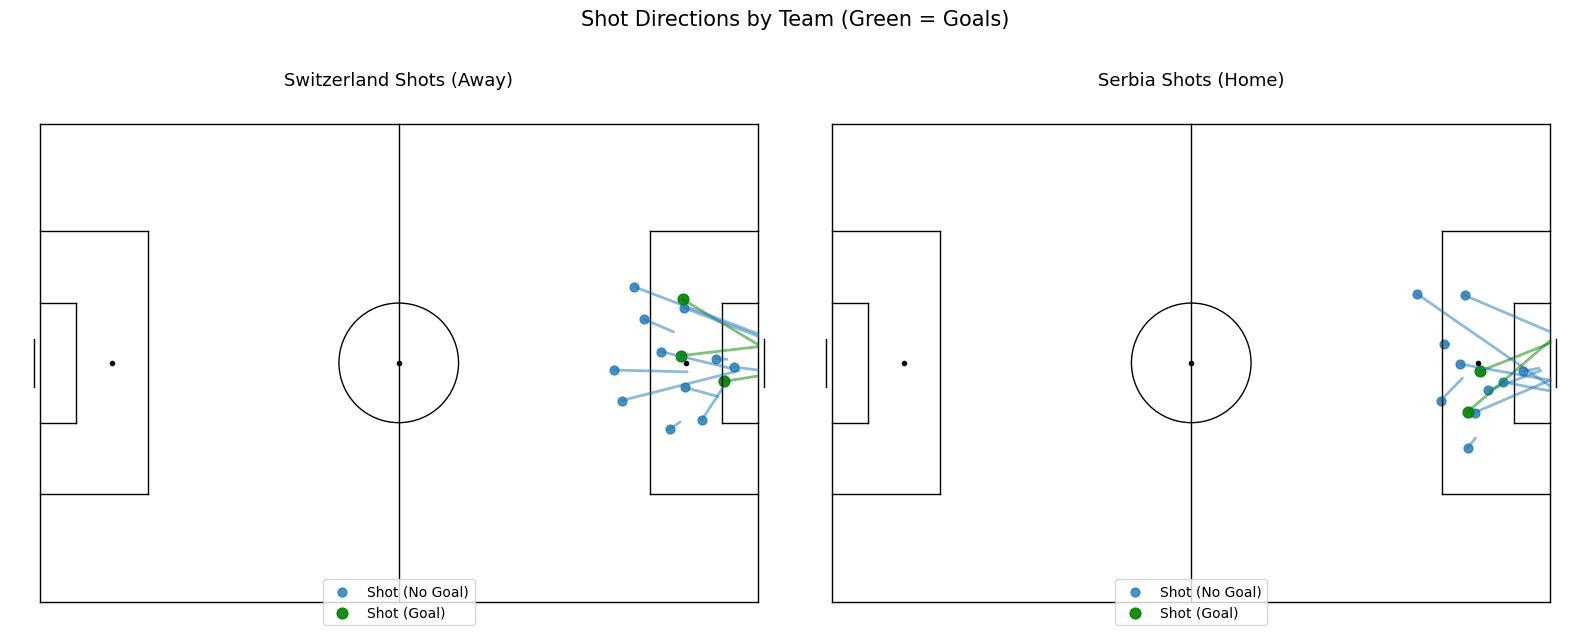

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- Pitch drawing ----------
def draw_pitch(ax=None, color="#000000", lw=1):
    """Draws a StatsBomb-style 120x80 pitch."""
    if ax is None:
        ax = plt.gca()

    # Pitch Outline & Centre Line
    ax.plot([0, 120], [0, 0], color=color, lw=lw)
    ax.plot([0, 120], [80, 80], color=color, lw=lw)
    ax.plot([0, 0], [0, 80], color=color, lw=lw)
    ax.plot([120, 120], [0, 80], color=color, lw=lw)
    ax.plot([60, 60], [0, 80], color=color, lw=lw)

    # Left Penalty Area
    ax.plot([18, 18], [18, 62], color=color, lw=lw)
    ax.plot([0, 18], [18, 18], color=color, lw=lw)
    ax.plot([0, 18], [62, 62], color=color, lw=lw)

    # Right Penalty Area
    ax.plot([102, 102], [18, 62], color=color, lw=lw)
    ax.plot([102, 120], [18, 18], color=color, lw=lw)
    ax.plot([102, 120], [62, 62], color=color, lw=lw)

    # Left 6-yard Box
    ax.plot([6, 6], [30, 50], color=color, lw=lw)
    ax.plot([0, 6], [30, 30], color=color, lw=lw)
    ax.plot([0, 6], [50, 50], color=color, lw=lw)

    # Right 6-yard Box
    ax.plot([114, 114], [30, 50], color=color, lw=lw)
    ax.plot([114, 120], [30, 30], color=color, lw=lw)
    ax.plot([114, 120], [50, 50], color=color, lw=lw)

    # Center Circle
    cc = plt.Circle((60, 40), 10, color=color, fill=False, lw=lw)
    ax.add_patch(cc)

    # Penalty Spots
    ax.plot(12, 40, marker='o', color=color, ms=3)
    ax.plot(108, 40, marker='o', color=color, ms=3)

    # Center Spot
    ax.plot(60, 40, marker='o', color=color, ms=3)

    # Goal Frames
    ax.plot([-1, -1], [36, 44], color=color, lw=lw)
    ax.plot([121, 121], [36, 44], color=color, lw=lw)

    ax.set_xlim(-5, 125)
    ax.set_ylim(-5, 85)
    ax.set_aspect('equal')
    ax.axis("off")

    return ax


def is_goal_value(v):
    if isinstance(v, dict):
        name = v.get("name")
    else:
        name = v
    return name == "Goal"


shots_with_end = shots.dropna(subset=["shot_end_location", "x", "y"]).copy()

shots_with_end["end_x"] = shots_with_end["shot_end_location"].apply(
    lambda v: v[0] if isinstance(v, (list, tuple)) and len(v) >= 2 else np.nan
)
shots_with_end["end_y"] = shots_with_end["shot_end_location"].apply(
    lambda v: v[1] if isinstance(v, (list, tuple)) and len(v) >= 2 else np.nan
)

shots_with_end = shots_with_end.dropna(subset=["end_x", "end_y"])
shots_with_end["is_goal"] = shots_with_end["shot_outcome"].apply(is_goal_value)

print("Shots total:", len(shots_with_end))

# Detect teams present in the shot data
teams_in_match = shots_with_end["team"].unique().tolist()
print("Teams in shots:", teams_in_match)

away_team = teams_in_match[0]
home_team = teams_in_match[1]

away_shots = shots_with_end[shots_with_end["team"] == away_team]
home_shots = shots_with_end[shots_with_end["team"] == home_team]

print(f"{away_team} shots: {len(away_shots)}, goals: {away_shots['is_goal'].sum()}")
print(f"{home_team} shots: {len(home_shots)}, goals: {home_shots['is_goal'].sum()}")


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Away team (left)
ax = axes[0]
draw_pitch(ax, color="black", lw=1)

for _, row in away_shots.iterrows():
    color = "green" if row["is_goal"] else "#1f77b4"
    ax.plot([row["x"], row["end_x"]],
            [row["y"], row["end_y"]],
            color=color,
            alpha=0.5,
            linewidth=2)

ax.scatter(
    away_shots.loc[~away_shots["is_goal"], "x"],
    away_shots.loc[~away_shots["is_goal"], "y"],
    s=40, color="#1f77b4", alpha=0.8, label="Shot (No Goal)"
)
ax.scatter(
    away_shots.loc[away_shots["is_goal"], "x"],
    away_shots.loc[away_shots["is_goal"], "y"],
    s=60, color="green", alpha=0.9, label="Shot (Goal)"
)

ax.set_title(f"{away_team} Shots (Away)", fontsize=13)
ax.legend(loc="lower center")

# Home team (right)
ax = axes[1]
draw_pitch(ax, color="black", lw=1)

for _, row in home_shots.iterrows():
    color = "green" if row["is_goal"] else "#1f77b4"
    ax.plot([row["x"], row["end_x"]],
            [row["y"], row["end_y"]],
            color=color,
            alpha=0.5,
            linewidth=2)

ax.scatter(
    home_shots.loc[~home_shots["is_goal"], "x"],
    home_shots.loc[~home_shots["is_goal"], "y"],
    s=40, color="#1f77b4", alpha=0.8, label="Shot (No Goal)"
)
ax.scatter(
    home_shots.loc[home_shots["is_goal"], "x"],
    home_shots.loc[home_shots["is_goal"], "y"],
    s=60, color="green", alpha=0.9, label="Shot (Goal)"
)

ax.set_title(f"{home_team} Shots (Home)", fontsize=13)
ax.legend(loc="lower center")

plt.suptitle("Shot Directions by Team (Green = Goals)", fontsize=15)
plt.tight_layout()
plt.show()

Number of passes: 966


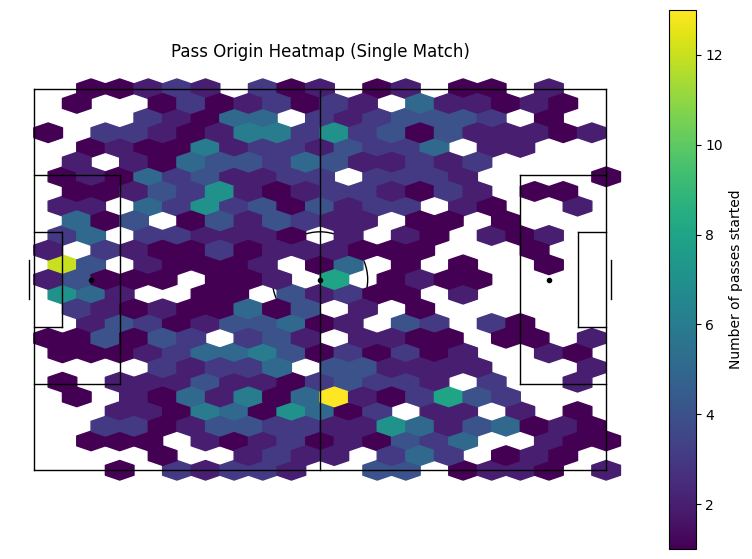

In [19]:
passes = events[events["type"] == "Pass"].copy()
passes = passes.dropna(subset=["x", "y"])

print("Number of passes:", len(passes))

fig, ax = plt.subplots(figsize=(10, 7))
draw_pitch(ax, color="black", lw=1)

hb = ax.hexbin(
    passes["x"],
    passes["y"],
    gridsize=(20, 13),
    extent=(0, 120, 0, 80),
    mincnt=1
)

cbar = fig.colorbar(hb, ax=ax)
cbar.set_label("Number of passes started")

ax.set_title("Pass Origin Heatmap (Single Match)")
plt.show()

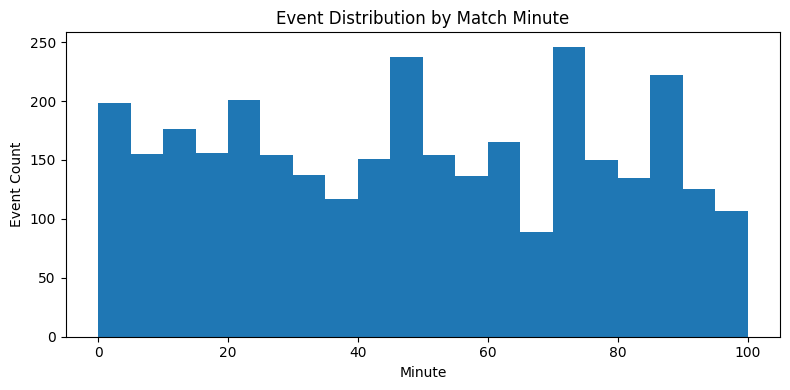

In [20]:
if "minute" in events.columns:
    plt.figure(figsize=(8, 4))
    events["minute"].dropna().astype(int).plot(kind="hist", bins=20)
    plt.xlabel("Minute")
    plt.ylabel("Event Count")
    plt.title("Event Distribution by Match Minute")
    plt.tight_layout()
    plt.show()
else:
    print("No 'minute' column in events.")

In [21]:
def shot_distance(x, y):
    return np.sqrt((120 - x)**2 + (40 - y)**2)

def shot_angle(x, y, goal_y_top=44, goal_y_bottom=36, goal_x=120):
    eps = 1e-6
    a = np.arctan2(goal_y_top - y, goal_x - x + eps)
    b = np.arctan2(goal_y_bottom - y, goal_x - x + eps)
    return np.abs(a - b)

if not shots.empty:
    shots["shot_distance"] = shot_distance(shots["x"], shots["y"])
    shots["shot_angle"] = shot_angle(shots["x"], shots["y"])

    display(shots[["team", "player", "minute", "x", "y", "shot_distance", "shot_angle"]].head())

/tmp/ipython-input-384080437.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["shot_distance"] = shot_distance(shots["x"], shots["y"])
/tmp/ipython-input-384080437.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots["shot_angle"] = shot_angle(shots["x"], shots["y"])


,team,player,minute,x,y,shot_distance,shot_angle
2674,Switzerland,Granit Xhaka,0,96.0,38.8,24.029981,0.329510
2675,Switzerland,Breel-Donald Embolo,0,113.1,40.7,6.935416,1.044074
2676,Switzerland,Granit Xhaka,0,103.8,41.9,16.311039,0.478177
2677,Serbia,Nikola Milenković,4,112.2,36.8,8.430896,0.847626
2678,Serbia,Andrija Živković,10,97.8,51.5,25.001800,0.283717


Number of crosses: 26


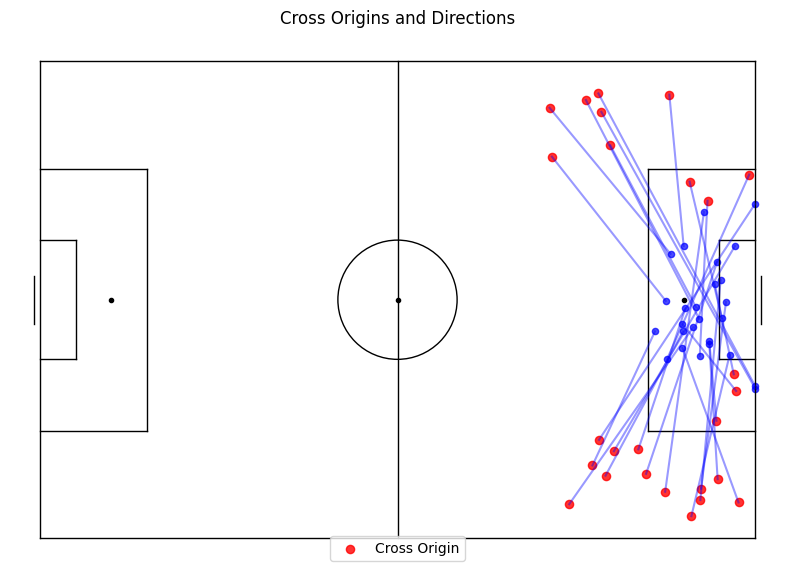

In [22]:
# Filter only crosses
crosses = passes[passes["pass_cross"] == True].copy()
print("Number of crosses:", len(crosses))

fig, ax = plt.subplots(figsize=(10, 7))
draw_pitch(ax, color="black", lw=1)

for _, row in crosses.iterrows():
    start_x, start_y = row["x"], row["y"]
    end_x, end_y = row["pass_end_location"]

    ax.plot([start_x, end_x], [start_y, end_y],
            color="blue", alpha=0.4, linewidth=1.5)

    # Cross destination
    ax.scatter(end_x, end_y, color="blue", s=20, alpha=0.7)

# Cross Origin
ax.scatter(crosses["x"], crosses["y"], color="red", s=35, alpha=0.8, label="Cross Origin")

ax.set_title("Cross Origins and Directions")
ax.legend()
plt.show()